In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from Modules import BaseDatasetPalm
from chronos import ChronosPipeline
from transformers import T5Tokenizer

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-tiny",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

data = BaseDatasetPalm(flower='male',time_windows=[0,39,39])





print(torch.get_num_threads())

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


6


In [1]:
import numpy as np

# Example data
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate the 25th, 50th, and 75th percentiles (1st, 2nd, and 3rd quartiles)
q25 = np.quantile(data, 0.25)  # 1st quartile
q50 = np.quantile(data, 0.50)  # 2nd quartile (median)
q75 = np.quantile(data, 0.75)  # 3rd quartile

print("25th percentile (Q1):", q25)
print("50th percentile (Median):", q50)
print("75th percentile (Q3):", q75)


25th percentile (Q1): 3.25
50th percentile (Median): 5.5
75th percentile (Q3): 7.75


In [2]:
meteo_plus_bunchload = [0.08544217795133591,
0.07050950825214386,
0.03188128396868706,
0.05177915841341019]

meteo_plus_flowers = [0.0883883461356163,
                      0.036482974886894226,
                      0.05331708490848541,
                      0.049431443214416504]


mean_1, std_1 =  np.mean(meteo_plus_bunchload), np.std(meteo_plus_bunchload)

mean_2, std_2 =  np.mean(meteo_plus_flowers), np.std(meteo_plus_flowers)



In [11]:
print(mean_1, std_1)
print(mean_2, std_2)

0.05990303214639425 0.020099508695439618
0.05690496228635311 0.019215796752547882


[-0.15320393 -1.34751563  0.66215529 -0.53876701 -0.81587137  1.22199546
 -0.75809218  0.20797639 -0.26316726  0.16137987]
[ -3.46660917 -30.49079808  14.98286385 -12.19090589 -18.4610617
  27.65060079 -17.1536678    4.70596844  -5.95479533   3.65160956]


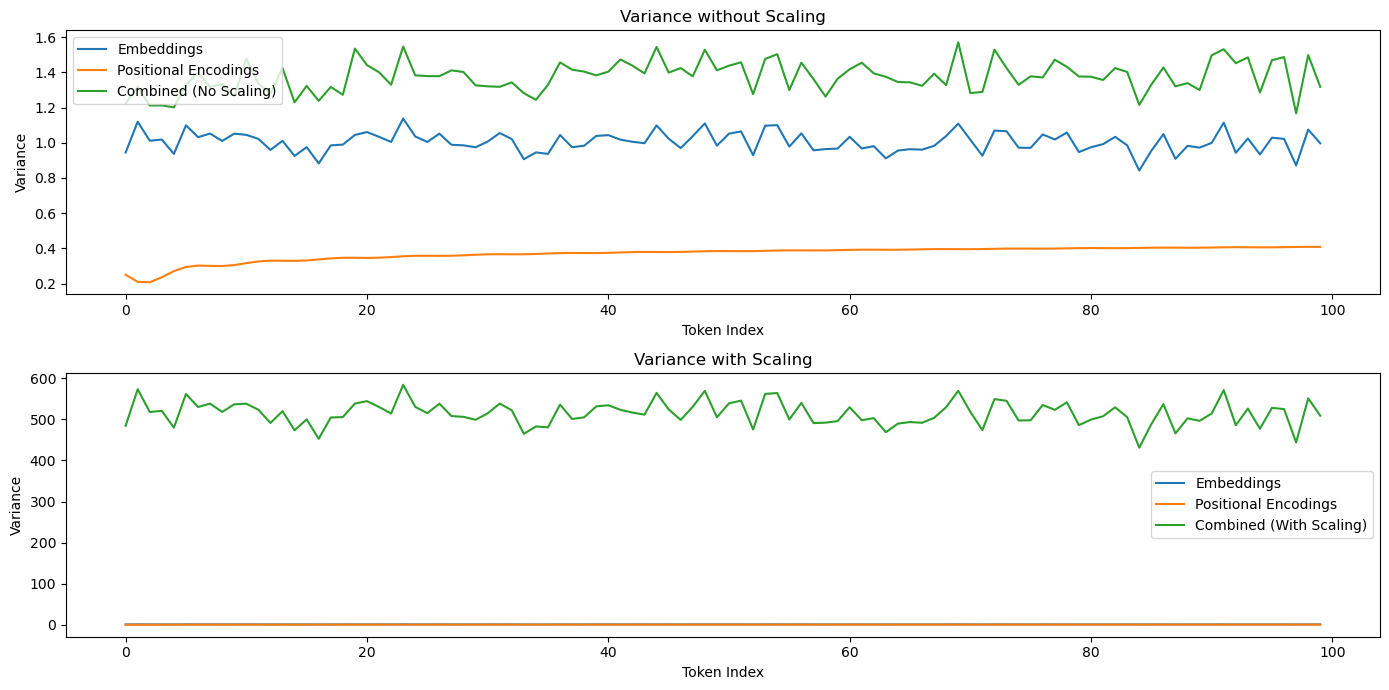

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_embeddings(num_tokens, d_model):
    return np.random.normal(size=(num_tokens, d_model))

def positional_encoding(d_model, num_tokens):
    positions = np.arange(num_tokens)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    pe = np.zeros((num_tokens, d_model))
    pe[:, 0::2] = np.sin(positions * div_term)
    pe[:, 1::2] = np.cos(positions * div_term)
    return pe

def visualize_scaling_effect(num_tokens=100, d_model=512):
    embeddings = generate_embeddings(num_tokens, d_model)
    print(embeddings[0,:10])
    print((embeddings * np.sqrt(d_model))[0,:10])
    pos_enc = positional_encoding(d_model, num_tokens)
    
    combined_no_scaling = embeddings + pos_enc
    combined_scaling = embeddings * np.sqrt(d_model) + pos_enc

    var_embeddings = np.var(embeddings, axis=1)
    var_pos_enc = np.var(pos_enc, axis=1)
    var_combined_no_scaling = np.var(combined_no_scaling, axis=1)
    var_combined_scaling = np.var(combined_scaling, axis=1)

    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.plot(var_embeddings, label='Embeddings')
    plt.plot(var_pos_enc, label='Positional Encodings')
    plt.plot(var_combined_no_scaling, label='Combined (No Scaling)')
    plt.title('Variance without Scaling')
    plt.xlabel('Token Index')
    plt.ylabel('Variance')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(var_embeddings, label='Embeddings')
    plt.plot(var_pos_enc, label='Positional Encodings')
    plt.plot(var_combined_scaling, label='Combined (With Scaling)')
    plt.title('Variance with Scaling')
    plt.xlabel('Token Index')
    plt.ylabel('Variance')
    plt.legend()

    plt.tight_layout()
    plt.show()

visualize_scaling_effect()


In [4]:
context = torch.from_numpy(data.X[768,:,7])
real_values = data.y[768]

print(context)
print(real_values)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1250, 0.0000, 0.0000, 0.0000, 0.2500, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1250, 0.2500, 0.1250, 0.0000, 0.2500,
        0.0000, 0.0000, 0.0000, 0.0000], dtype=torch.float64)
[[0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.25]
 [0.  ]
 [0.  ]]


In [5]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension

prediction_length = len(real_values)

forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(context-1), len(context) + prediction_length)

low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

2024-07-31 08:58:26.270670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 08:58:26.480041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 08:58:26.481506: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 08:58:26.804740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 08:58:28.415004: W tensorflow/compiler/tf

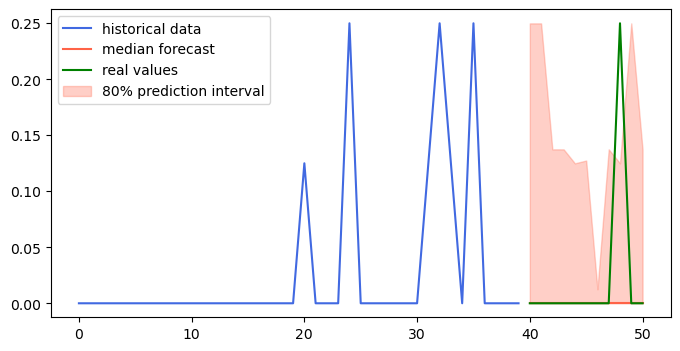

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(context, color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.plot(np.arange(len(context-1), len(context) + prediction_length),real_values, color="green", label="real values")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.show()

In [7]:
import pandas as pd
import numpy as np

data_male = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN/Model_Prediction_male_all_data.csv')

data_female = pd.read_csv('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/20240725_Predictions_CNN/Model_Prediction_female_all_data.csv')

In [8]:
female_actual = data_female['Actual']
male_actual = data_male['Actual']

female_predicted = data_female['Predicted']
male_predicted = data_male['Predicted']

trend_predicted = male_predicted - female_predicted

trend_actual = male_actual - female_actual

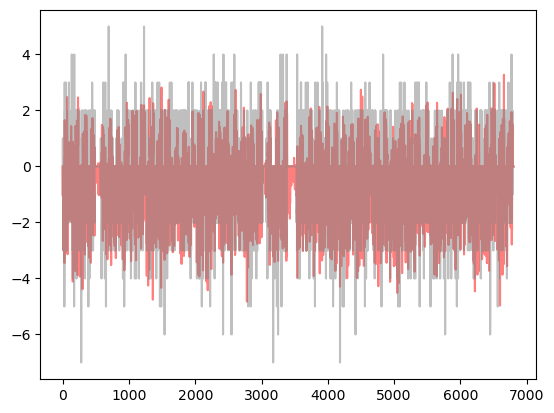

In [9]:
import matplotlib.pyplot as plt

plt.plot(trend_predicted,c='red',label='predicted', alpha=0.5)
plt.plot(trend_actual,c='gray', label='actual', alpha=0.5)
plt.show()

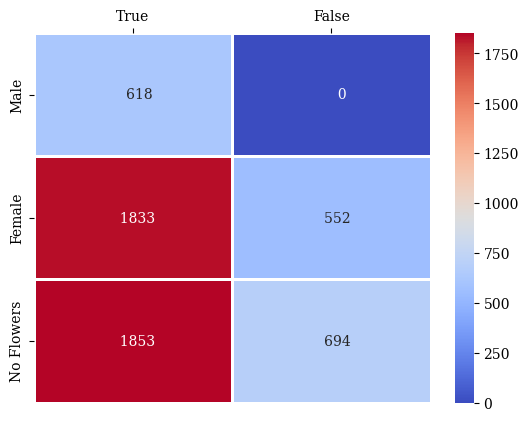

[[ 618    0]
 [1833  552]
 [1853  694]]
552 0
313 381


In [10]:
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

true_male = 0
true_female = 0
false_male = 0
false_female = 0

true_no_flowers = 0
false_no_flowers = 0

false_no_prediction_m = 0
false_no_prediction_f = 0

false_female_prediction_m = 0
false_female_prediction_f = 0

for real, pred in zip(trend_actual, trend_predicted):
    if real > 0 and pred > 0:
        true_male += 1
    elif real < 0 and pred < 0:
        true_female += 1
    elif real < 0 and pred > 0:
        false_male
    elif real > 0 and pred < 0:
        false_female += 1
        if real > 0:
            false_female_prediction_m += 1
        elif real < 0:
            false_female_prediction_f += 1
    elif real == 0 and pred == 0.0:
        true_no_flowers += 1
    elif real != 0 and pred == 0.0:
        false_no_flowers += 1
        if real > 0:
            false_no_prediction_m += 1
        elif real < 0:
            false_no_prediction_f += 1
        
    


confusion_matrix = np.array(([true_male,false_male],
                             [true_female,false_female],
                             [true_no_flowers, false_no_flowers]))
x_labels = ['True', 'False']
y_labels = ['Male', 'Female', 'No Flowers']
ax = sns.heatmap(confusion_matrix, cbar=True, 
                 xticklabels=x_labels, yticklabels=y_labels, 
                 annot=True,  fmt='6d',
                 linewidths=1, cmap='coolwarm')
ax.xaxis.tick_top()

plt.savefig('/home/u108-n256/PalmProject/NeuralNetwork_Testing/Saved_Objects/Graphs/Confusion_Matrix.svg')
plt.show()
print(confusion_matrix)
print(false_female_prediction_m, false_female_prediction_f)
print(false_no_prediction_m, false_no_prediction_f)
